In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [2]:
np.random.seed(10) 
top_words = 1000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(
                                num_words=top_words)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [4]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.25))
model.add(Conv1D(filters=32, kernel_size=3, padding="same",
                 activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           32000     
_________________________________________________________________
dropout (Dropout)            (None, 500, 32)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [5]:
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=5, batch_size=128, verbose=2)

Epoch 1/5
157/157 - 9s - loss: 0.5784 - accuracy: 0.6769 - val_loss: 0.3653 - val_accuracy: 0.8402
Epoch 2/5
157/157 - 9s - loss: 0.3515 - accuracy: 0.8514 - val_loss: 0.3419 - val_accuracy: 0.8582
Epoch 3/5
157/157 - 9s - loss: 0.3157 - accuracy: 0.8698 - val_loss: 0.3210 - val_accuracy: 0.8628
Epoch 4/5
157/157 - 9s - loss: 0.3073 - accuracy: 0.8729 - val_loss: 0.3177 - val_accuracy: 0.8638
Epoch 5/5
157/157 - 9s - loss: 0.2921 - accuracy: 0.8806 - val_loss: 0.3141 - val_accuracy: 0.8660


In [6]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("test data {:.2f}".format(accuracy))

test data 0.87


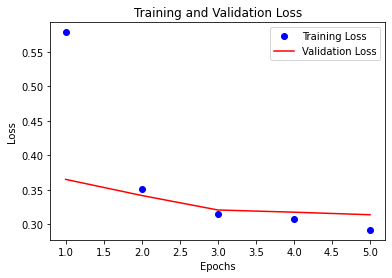

In [7]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

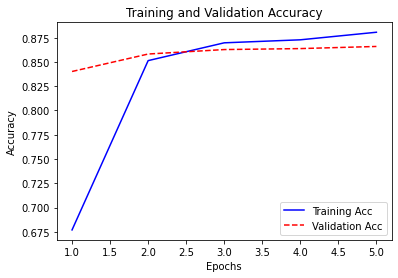

In [9]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()